In [1]:

!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 411.5 MB 7.6 kB/s 
     |████████████████████████████████| 412.3 MB 25 kB/s 
     |████████████████████████████████| 240 kB 73.1 MB/s 
     |████████████████████████████████| 171 kB 76.6 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 3.8 MB 46.3 MB/s 
     |████████████████████████████████| 503 kB 51.6 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bd4ea80f5ba0feb74fa3ab07bae3c8d10d40c21731c55f8eaa8a6db07c68107d
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting

In [2]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-03,1393.000000,1421.900024,1377.300049,1414.449951,1392.167847,11236850
1,2021-05-04,1409.949951,1423.000000,1383.300049,1388.349976,1366.479004,10743164
2,2021-05-05,1401.000000,1409.599976,1381.699951,1402.599976,1380.504517,7210806
3,2021-05-06,1407.599976,1410.800049,1395.000000,1400.900024,1378.831299,5738522
4,2021-05-07,1412.949951,1424.949951,1410.250000,1414.750000,1392.463135,6024167


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-03,1393.000000,1421.900024,1377.300049,1414.449951,1392.167847,11236850
2021-05-04,1409.949951,1423.000000,1383.300049,1388.349976,1366.479004,10743164
2021-05-05,1401.000000,1409.599976,1381.699951,1402.599976,1380.504517,7210806
2021-05-06,1407.599976,1410.800049,1395.000000,1400.900024,1378.831299,5738522
2021-05-07,1412.949951,1424.949951,1410.250000,1414.750000,1392.463135,6024167


In [8]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [9]:
env.signal_features

array([[ 1.41444995e+03,  0.00000000e+00],
       [ 1.38834998e+03, -2.60999750e+01],
       [ 1.40259998e+03,  1.42500000e+01],
       [ 1.40090002e+03, -1.69995200e+00],
       [ 1.41475000e+03,  1.38499760e+01],
       [ 1.41984998e+03,  5.09997600e+00],
       [ 1.40355005e+03, -1.62999270e+01],
       [ 1.39950000e+03, -4.05004900e+00],
       [ 1.38684998e+03, -1.26500240e+01],
       [ 1.44025000e+03,  5.34000240e+01],
       [ 1.47669995e+03,  3.64499510e+01],
       [ 1.45819995e+03, -1.85000000e+01],
       [ 1.43280005e+03, -2.53999020e+01],
       [ 1.49730005e+03,  6.45000000e+01],
       [ 1.50994995e+03,  1.26499020e+01],
       [ 1.47894995e+03, -3.10000000e+01],
       [ 1.47705005e+03, -1.89990200e+00],
       [ 1.48265002e+03,  5.59997500e+00],
       [ 1.50344995e+03,  2.07999270e+01],
       [ 1.51584998e+03,  1.24000250e+01],
       [ 1.51169995e+03, -4.15002500e+00],
       [ 1.50400000e+03, -7.69995100e+00],
       [ 1.52055005e+03,  1.65500490e+01],
       [ 1.

In [10]:
#Build the environment
env.action_space

Discrete(2)

info {'total_reward': -33.900024999999914, 'total_profit': 0.6783272078958251, 'position': 1}


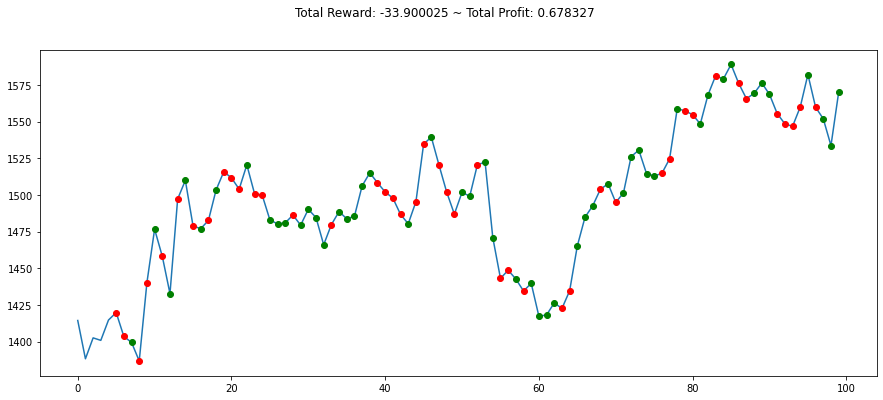

In [11]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [12]:
#Build Environment and Train
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [13]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=100000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.00248 |
| fps                | 10       |
| nupdates           | 1        |
| policy_entropy     | 0.692    |
| total_timesteps    | 5        |
| value_loss         | 1.29e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.67e-05 |
| fps                | 180      |
| nupdates           | 100      |
| policy_entropy     | 0.692    |
| total_timesteps    | 500      |
| value_loss         | 147      |
---------------------------------
----------------------------------
| explained_variance | -8.58e-06 |
| fps                | 201   

In [14]:
env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 2.099975000000086, 'total_profit': 0.9410346366763707, 'position': 1}


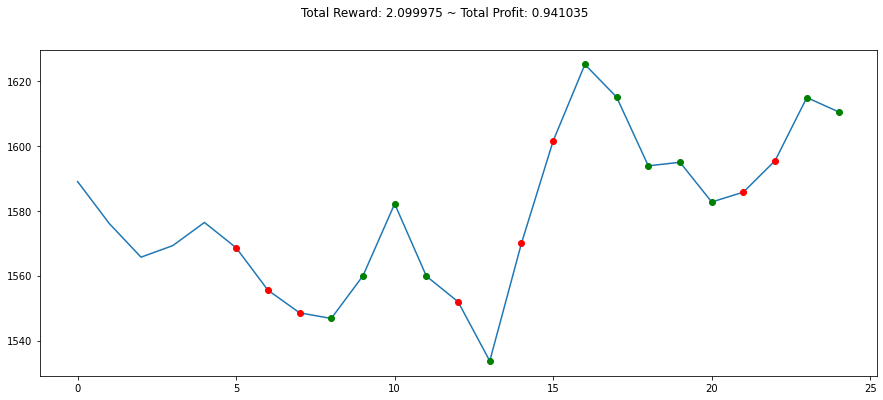

In [15]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()